# CAD Modeling
So after all the preprocessing, we now have 3 main datasets. Undersampled and Oversampled each have a standardized and normalized version of their data.

*   Original Dataset
*   Undersampled Dataset
*   Oversampled Dataset (SMOTE)

We now need to train and test with some models.

*   Random Forest Classifier
*   Naives Bayes
*   SVM
*   Decision Tree
*   Logistic Regression
*   K-nearest neighbors




Small note: Conventions we will be using to refer to the type of dataset are the following:
*   us = Undersample
*   os = Oversample
*   std = Standardized
*   nrm = Normalized

In [4]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

In [5]:
# Function to evaluate the model
def evaluate_model(y_true, y_pred):
    accuracy = accuracy_score(y_true, y_pred)
    report = classification_report(y_true, y_pred)
    conf_matrix = confusion_matrix(y_true, y_pred)
    return accuracy, report, conf_matrix


In [6]:
X_train = pd.read_csv('X_oversample_resampled_encoded_finished_norm_scaled_finished.csv')
X_test = pd.read_csv('X_test_os_encoded_finished_norm_scaled_finished.csv')
y_train = pd.read_csv('y_oversample_resampled_encoded_finished_norm_scaled_finished.csv')
y_test = pd.read_csv('y_test_os_encoded_finished_norm_scaled_finished.csv')



In [7]:
# Logistic Regression
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train.values.ravel())
y_pred_log_reg = log_reg.predict(X_test)

ValueError: ignored

In [12]:
# Evaluate Logistic Regression
accuracy_log_reg, report_log_reg, conf_matrix_log_reg = evaluate_model(y_test, y_pred_log_reg)

In [13]:
# K-Nearest Neighbors
knn = KNeighborsClassifier()
knn.fit(X_train, y_train.values.ravel())
y_pred_knn = knn.predict(X_test)

In [14]:
# Evaluate KNN
accuracy_knn, report_knn, conf_matrix_knn = evaluate_model(y_test, y_pred_knn)

In [16]:
# Decision Tree
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train.values.ravel())
y_pred_decision_tree = decision_tree.predict(X_test)

In [17]:
# Evaluate Decision Tree
accuracy_decision_tree, report_decision_tree, conf_matrix_decision_tree = evaluate_model(y_test, y_pred_decision_tree)

In [18]:
print("Logistic Regression Results:")
print("Accuracy:", accuracy_log_reg)
print("Classification Report:\n", report_log_reg)
print("Confusion Matrix:\n", conf_matrix_log_reg)

Logistic Regression Results:
Accuracy: 0.7694915254237288
Classification Report:
               precision    recall  f1-score   support

           0       0.59      0.70      0.64       347
           1       0.87      0.80      0.83       833

    accuracy                           0.77      1180
   macro avg       0.73      0.75      0.74      1180
weighted avg       0.78      0.77      0.77      1180

Confusion Matrix:
 [[244 103]
 [169 664]]


In [19]:
print("\nKNN Results:")
print("Accuracy:", accuracy_knn)
print("Classification Report:\n", report_knn)
print("Confusion Matrix:\n", conf_matrix_knn)


KNN Results:
Accuracy: 0.7686440677966102
Classification Report:
               precision    recall  f1-score   support

           0       0.61      0.60      0.60       347
           1       0.83      0.84      0.84       833

    accuracy                           0.77      1180
   macro avg       0.72      0.72      0.72      1180
weighted avg       0.77      0.77      0.77      1180

Confusion Matrix:
 [[209 138]
 [135 698]]


In [20]:
print("\nDecision Tree Results:")
print("Accuracy:", accuracy_decision_tree)
print("Classification Report:\n", report_decision_tree)
print("Confusion Matrix:\n", conf_matrix_decision_tree)


Decision Tree Results:
Accuracy: 0.75
Classification Report:
               precision    recall  f1-score   support

           0       0.57      0.61      0.59       347
           1       0.83      0.81      0.82       833

    accuracy                           0.75      1180
   macro avg       0.70      0.71      0.70      1180
weighted avg       0.76      0.75      0.75      1180

Confusion Matrix:
 [[211 136]
 [159 674]]


In [21]:
from sklearn.model_selection import GridSearchCV

# Hyperparameters to tune
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],  # Regularization parameter
    'penalty': ['l1', 'l2']  # L1 and L2 regularization
}

# Create grid search object
grid_search = GridSearchCV(LogisticRegression(), param_grid, cv=5, verbose=0, scoring='accuracy')

# Fit the grid search to the data
grid_search.fit(X_train, y_train.values.ravel())

# Get the best parameters
best_params = grid_search.best_params_

# Train Logistic Regression with the best parameters
log_reg_tuned = LogisticRegression(C=best_params['C'], penalty=best_params['penalty'])
log_reg_tuned.fit(X_train, y_train.values.ravel())

# Predictions
y_pred_log_reg_tuned = log_reg_tuned.predict(X_test)

# Evaluate the tuned model
accuracy_log_reg_tuned, report_log_reg_tuned, conf_matrix_log_reg_tuned = evaluate_model(y_test, y_pred_log_reg_tuned)

# Print the results
print("Tuned Logistic Regression Results:")
print("Best Parameters:", best_params)
print("Accuracy:", accuracy_log_reg_tuned)
print("Classification Report:\n", report_log_reg_tuned)
print("Confusion Matrix:\n", conf_matrix_log_reg_tuned)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Tuned Logistic Regression Results:
Best Parameters: {'C': 1, 'penalty': 'l2'}
Accuracy: 0.7694915254237288
Classification Report:
               precision    recall  f1-score   support

           0       0.59      0.70      0.64       347
           1       0.87      0.80      0.83       833

    accuracy                           0.77      1180
   macro avg       0.73      0.75      0.74      1180
weighted avg       0.78      0.77      0.77      1180

Confusion Matrix:
 [[244 103]
 [169 664]]


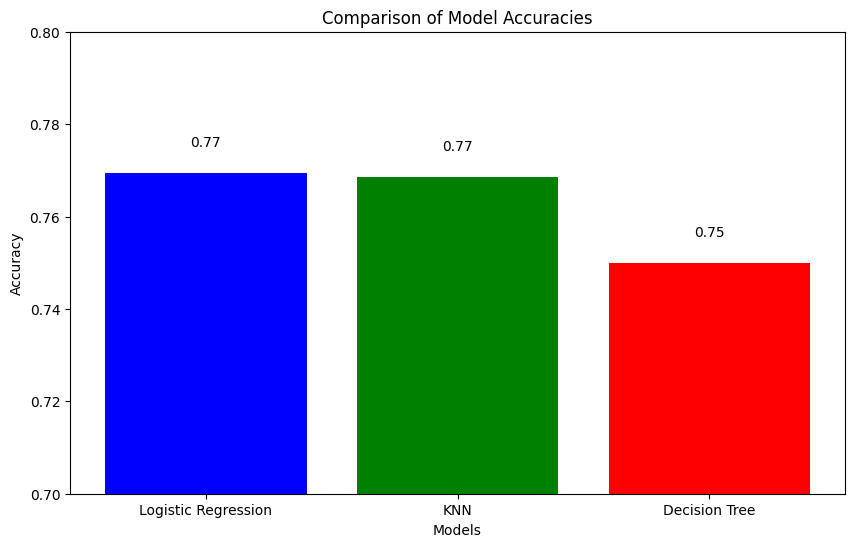

In [22]:
import matplotlib.pyplot as plt

# Model names
models = ['Logistic Regression', 'KNN', 'Decision Tree']

# Corresponding accuracies
accuracies = [0.7694915254237288, 0.7686440677966102, 0.75]

# Plotting the accuracies
plt.figure(figsize=(10, 6))
plt.bar(models, accuracies, color=['blue', 'green', 'red'])
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Comparison of Model Accuracies')
plt.ylim(0.7, 0.8)  # Setting the y-axis limit for better visualization
for i, v in enumerate(accuracies):
    plt.text(i, v + 0.005, f"{v:.2f}", ha='center', va='bottom')
plt.show()
